In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from MLfunctions import load_data, load_raw_data
import numpy as np
from MLfunctions import test_model
from models import CNN
from functions import get_start_date, get_end_date
from matplotlib.pyplot import figure

In [2]:
with open("CLGB_2013_06_to_2015_05_v1.csv") as flow, open("LabeledByPrecipitation.csv") as precip:
    features, labels = load_data(flow, precip, "Q.cms")

In [3]:
with open("CLGB_2013_06_to_2015_05_v1.csv") as flow, open("LabeledByPrecipitation.csv") as precip:
    features_withdatetime = load_raw_data(flow, precip, "Q.cms")

In [4]:
features_withdatetime

z-score     trend  rolling_mean      flow  midday  is_storm  \
8     -0.248556  0.000329      0.010984  0.011207      10       0.0   
12    -0.245957  0.000259      0.011069  0.011532       9       0.0   
16    -0.244190  0.000035      0.011124  0.011753       8       0.0   
20    -0.246829 -0.000046      0.011133  0.011423       7       0.0   
24    -0.247692  0.000010      0.011139  0.011315       6       0.0   
...         ...       ...           ...       ...     ...       ...   
69940 -0.220846 -0.000233      0.021203  0.014672       1       0.0   
69944 -0.222685  0.000101      0.021180  0.014442       2       0.0   
69948 -0.220294  0.000095      0.021157  0.014741       3       0.0   
69952 -0.213832  0.000488      0.021133  0.015549       4       0.0   
69964 -0.211049 -0.000074      0.021066  0.015897       7       0.0   

                 DateTime  
8     2013-06-01 02:00:00  
12    2013-06-01 03:00:00  
16    2013-06-01 04:00:00  
20    2013-06-01 05:00:00  
24    2013-06-01 06:00:00  
...                   ...  
69940 2015-05-30 13:00:00  
69944 2015-05-30 14:00:00  
69948 2015-05-30 15:00:00  
69952 2015-05-30 16:00:00  
69964 2015-05-30 19:00:00  

[10746 rows x 7 columns]

In [5]:
features_withdatetime["DateTime"]

8       2013-06-01 02:00:00
12      2013-06-01 03:00:00
16      2013-06-01 04:00:00
20      2013-06-01 05:00:00
24      2013-06-01 06:00:00
                ...        
69940   2015-05-30 13:00:00
69944   2015-05-30 14:00:00
69948   2015-05-30 15:00:00
69952   2015-05-30 16:00:00
69964   2015-05-30 19:00:00
Name: DateTime, Length: 10746, dtype: datetime64[ns]

In [6]:
datetime = features_withdatetime["DateTime"]

In [7]:
print(datetime)

8       2013-06-01 02:00:00
12      2013-06-01 03:00:00
16      2013-06-01 04:00:00
20      2013-06-01 05:00:00
24      2013-06-01 06:00:00
                ...        
69940   2015-05-30 13:00:00
69944   2015-05-30 14:00:00
69948   2015-05-30 15:00:00
69952   2015-05-30 16:00:00
69964   2015-05-30 19:00:00
Name: DateTime, Length: 10746, dtype: datetime64[ns]


In [8]:
cnn_model = CNN(features.shape[1])

In [9]:
saved_model = cnn_model.load("cnn_model.py")

In [10]:
print(saved_model)

None


In [11]:
predictions = cnn_model.predict(features)

In [12]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [13]:
len(predictions)

10746

In [14]:
unique, counts = np.unique(predictions, return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.000e+00 3.098e+03]
 [1.000e+00 7.648e+03]]


In [15]:
print(features)

[[-2.48556052e-01  3.29400000e-04  1.09835556e-02  1.12070000e-02
   1.00000000e+01]
 [-2.45956976e-01  2.59000000e-04  1.10691538e-02  1.15320000e-02
   9.00000000e+00]
 [-2.44189604e-01  3.50000000e-05  1.11244706e-02  1.17530000e-02
   8.00000000e+00]
 ...
 [-2.20294097e-01  9.48000000e-05  2.11566378e-02  1.47410000e-02
   3.00000000e+00]
 [-2.13832394e-01  4.88400000e-04  2.11331688e-02  1.55490000e-02
   4.00000000e+00]
 [-2.11049383e-01 -7.36000000e-05  2.10664514e-02  1.58970000e-02
   7.00000000e+00]]


In [16]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [17]:
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.000e+00 4.282e+03]
 [1.000e+00 6.464e+03]]


In [18]:
len(labels)

10746

In [19]:
flow = features[0:,3]

In [20]:
print(flow)

[0.011207 0.011532 0.011753 ... 0.014741 0.015549 0.015897]


In [21]:
len(flow)

10746

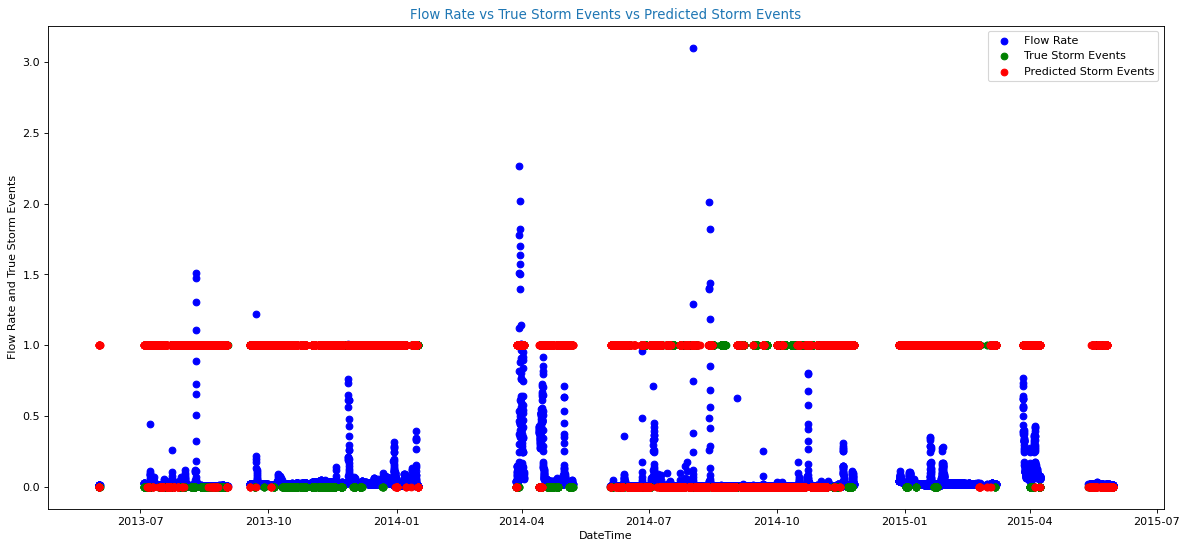

In [22]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()

(16068, 16071)

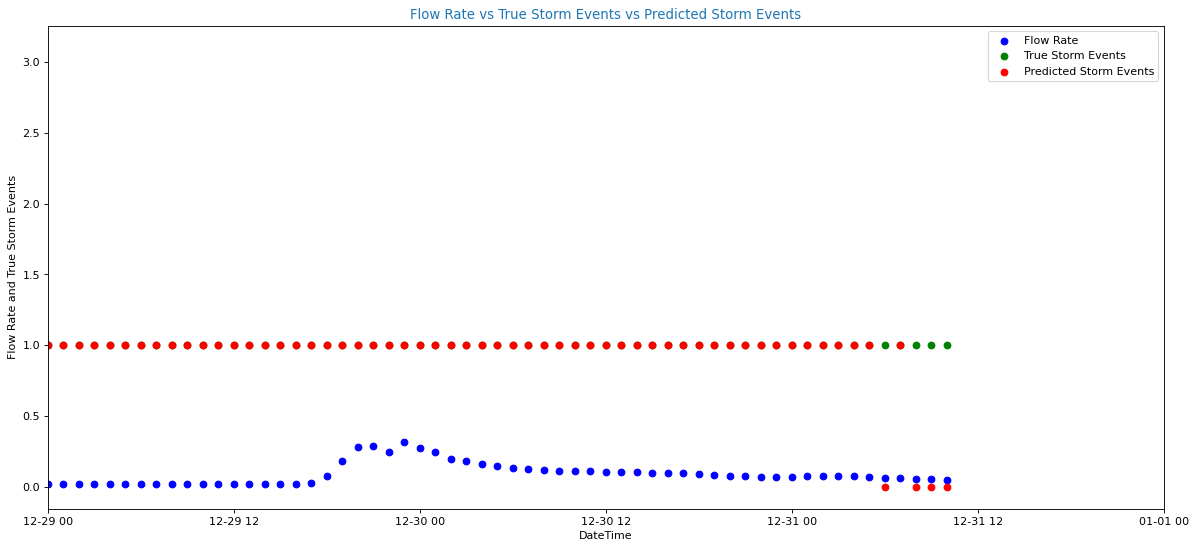

In [23]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16068,16071])

(16068, 16071)

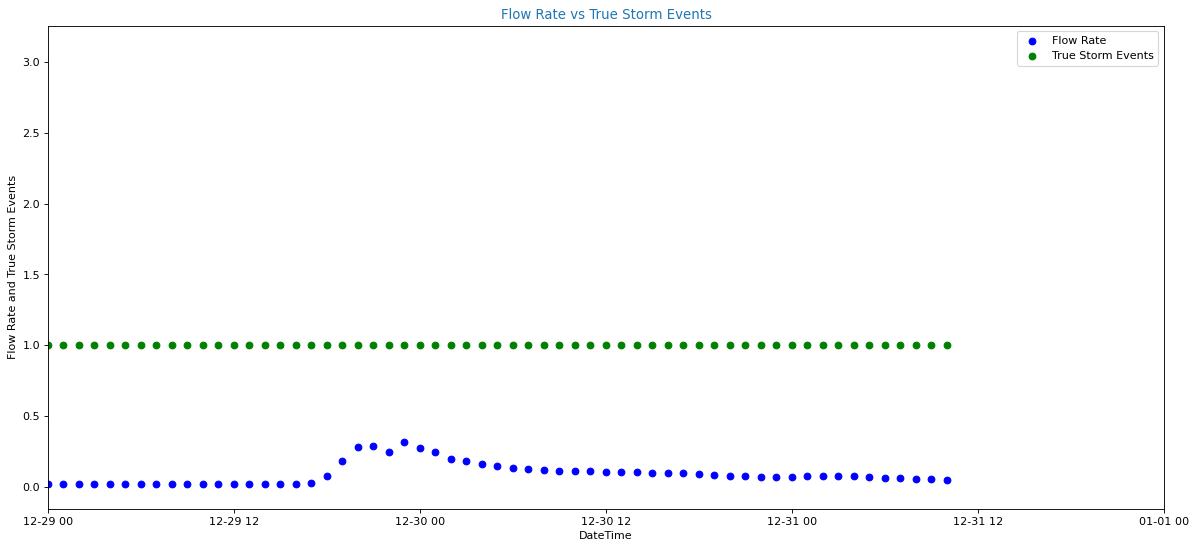

In [24]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.legend()
ax.set_xlim([16068,16071])

(16068, 16071)

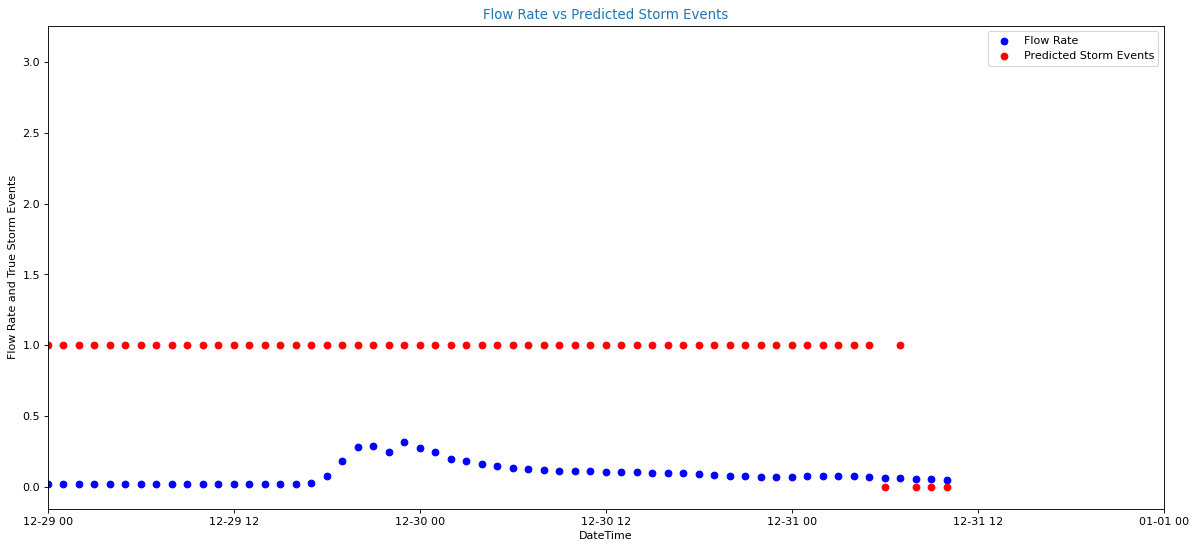

In [25]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16068,16071])

(16295, 16297)

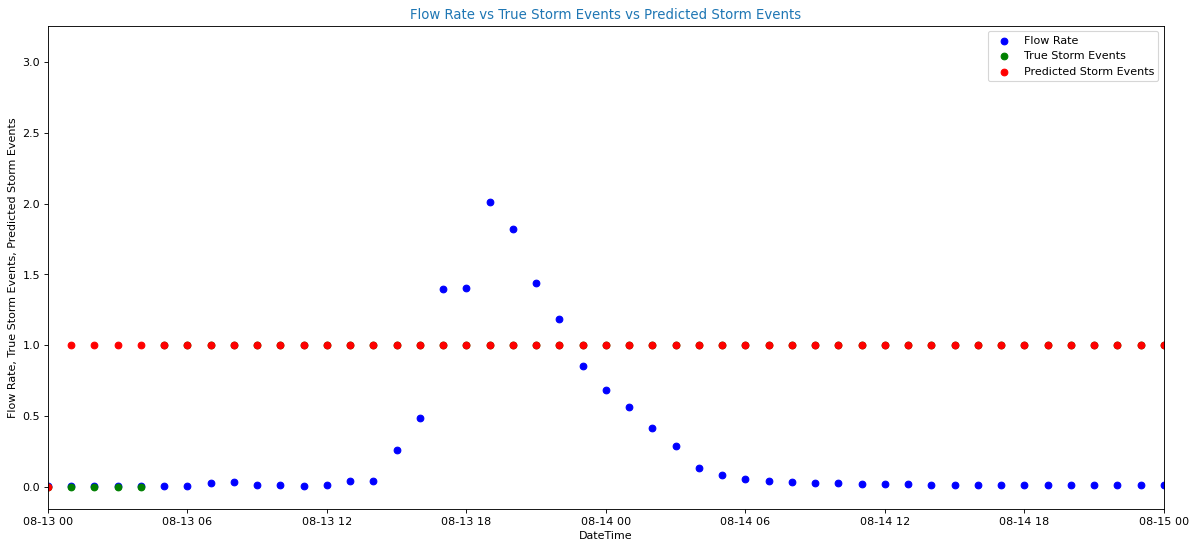

In [26]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16295,16297])

(16295, 16297)

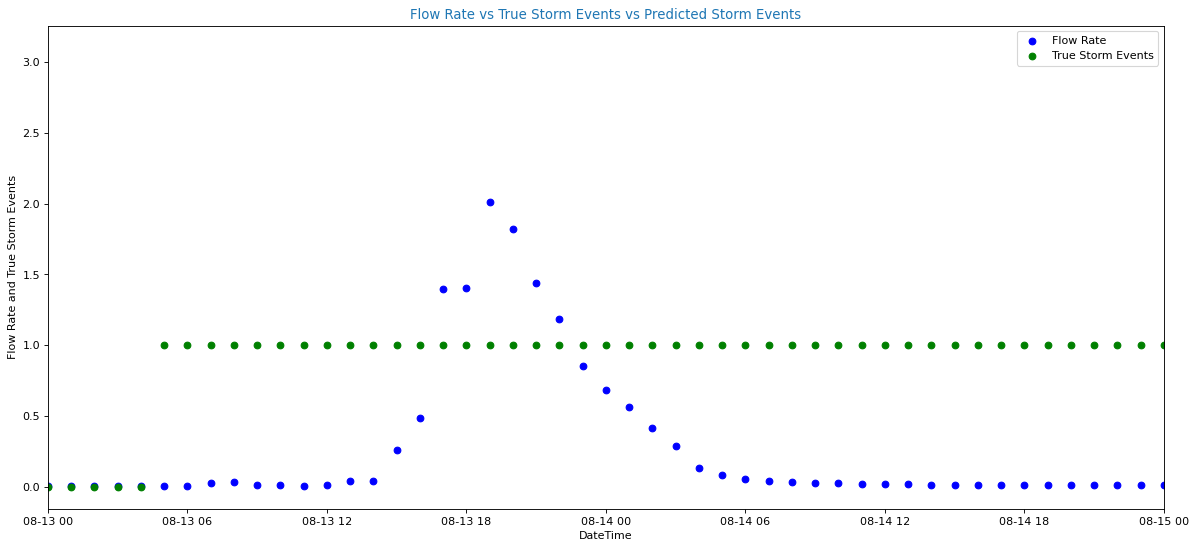

In [27]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.legend()
ax.set_xlim([16295,16297])

(16295, 16297)

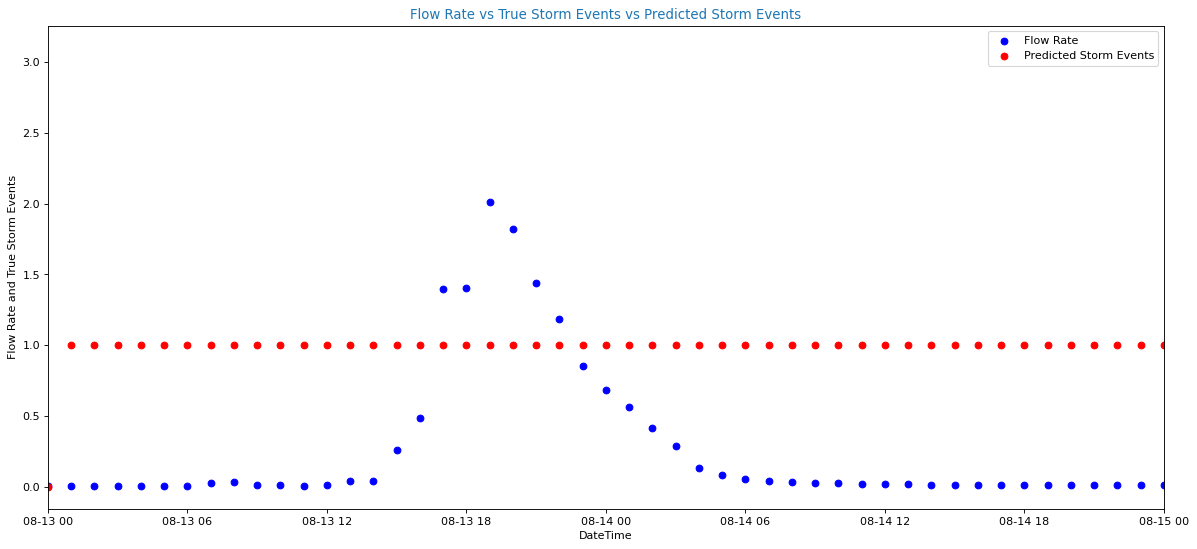

In [28]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate and True Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16295,16297])

(16487, 16490)

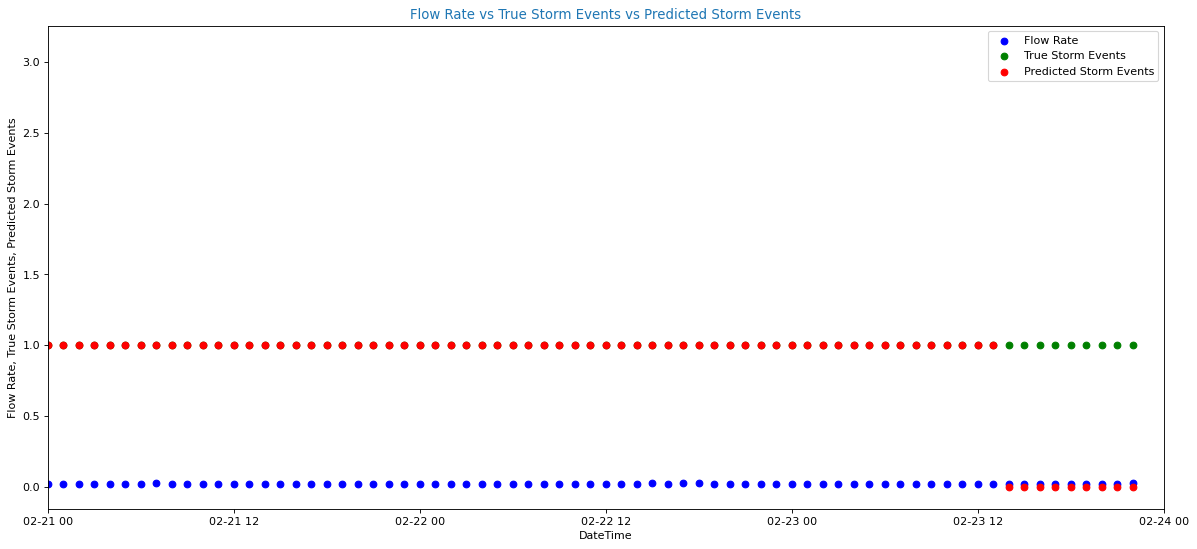

In [29]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16487,16490])

(16054, 16057)

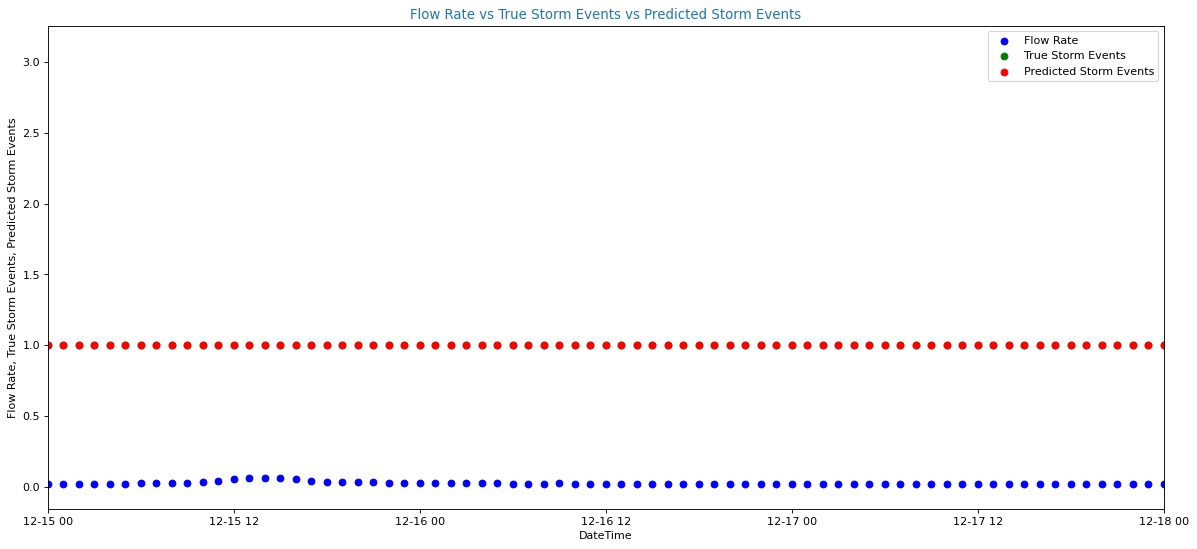

In [30]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16054,16057])

(16158, 16163)

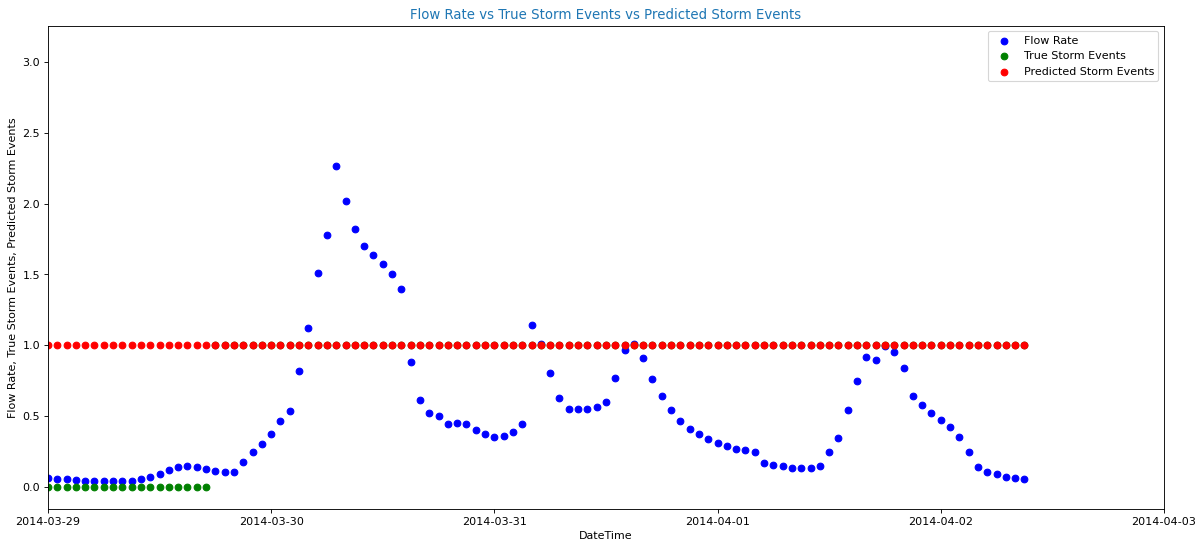

In [31]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16158,16163])

# START HERE

(15893, 15895)

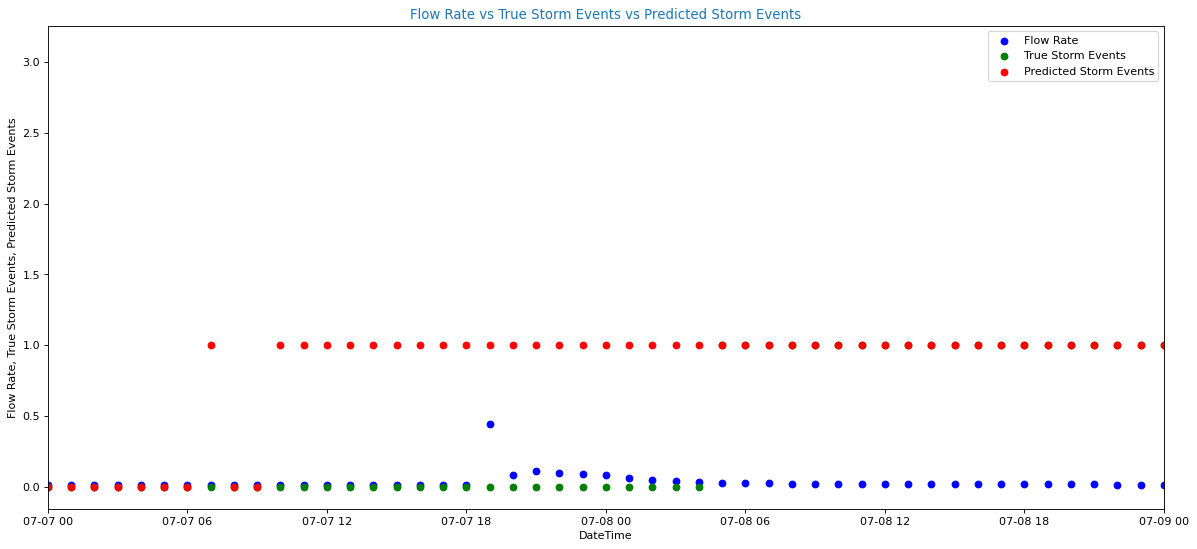

In [32]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15893,15895])

(15895, 15899)

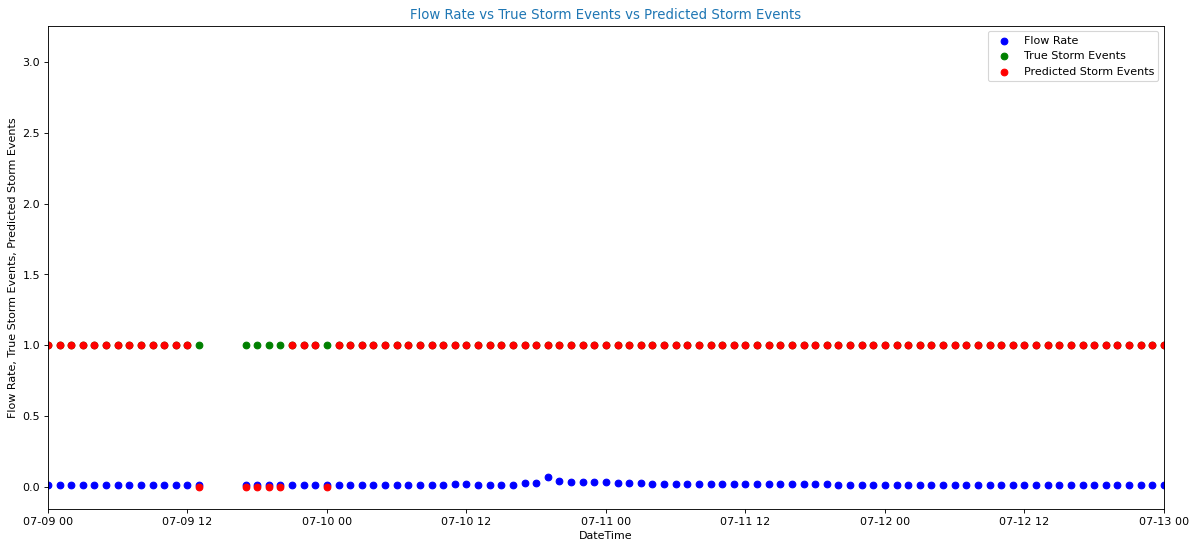

In [33]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15895,15899])

(15899, 15908)

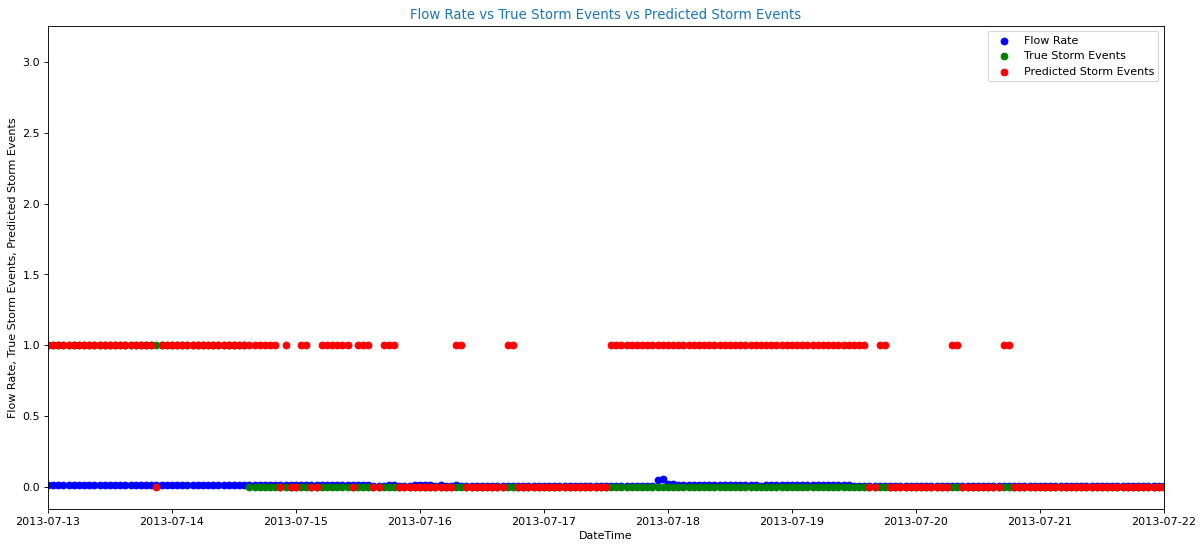

In [34]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15899,15908])

(15908, 15911)

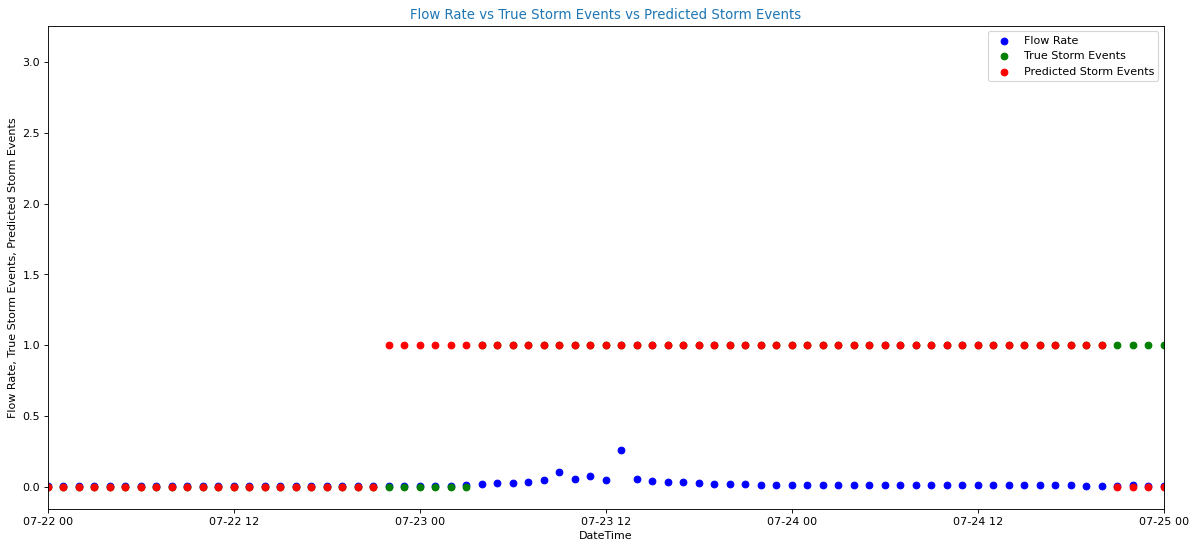

In [35]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15908,15911])

(15911, 15914)

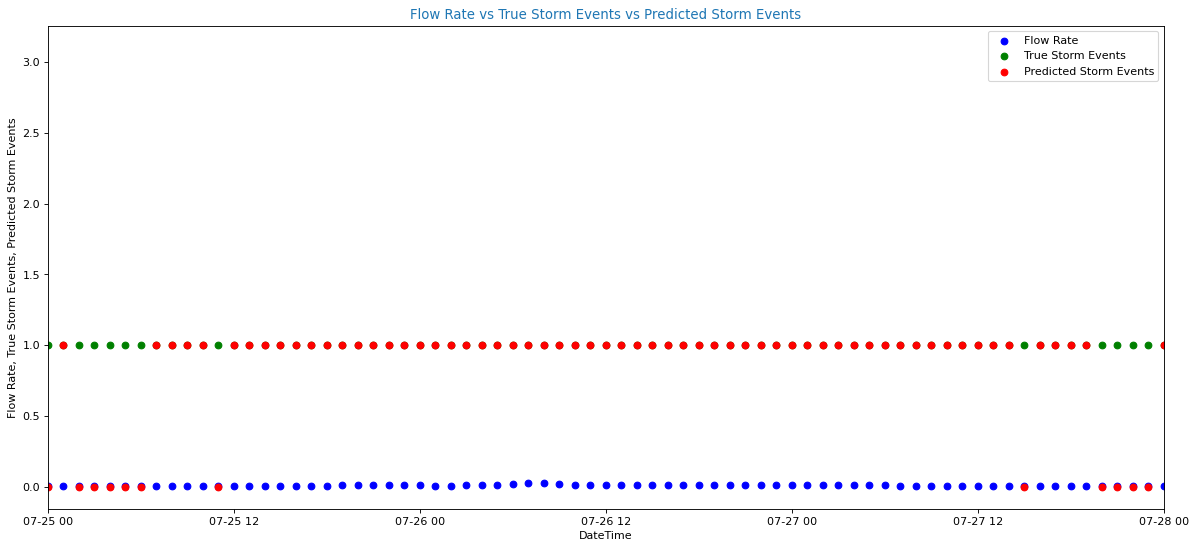

In [36]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15911,15914])

(15914, 15918)

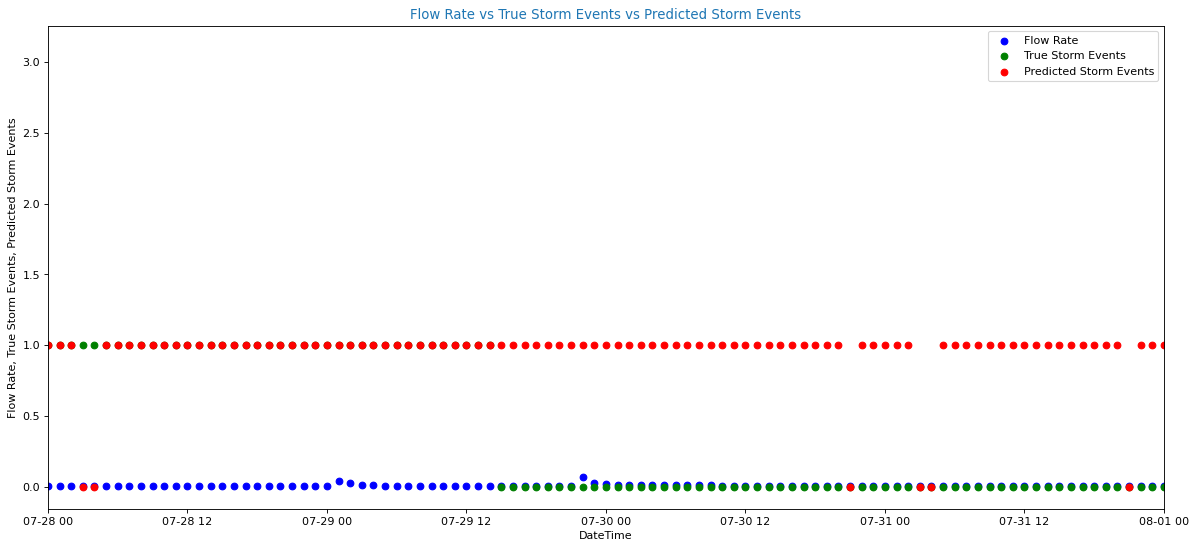

In [37]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15914,15918])

(15918, 15921)

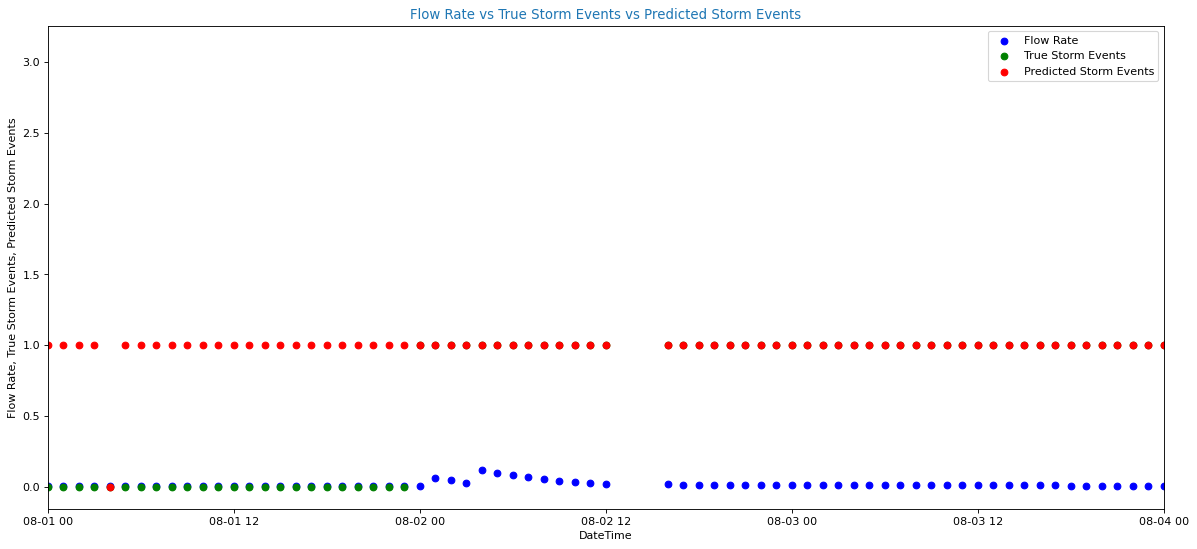

In [38]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15918,15921])

(15921, 15925)

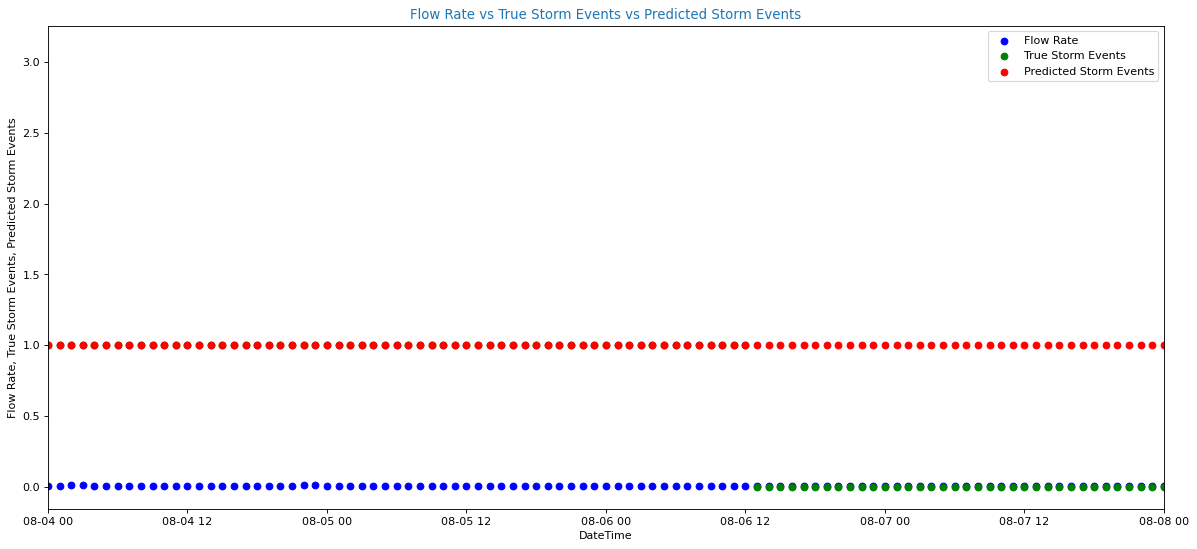

In [39]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15921,15925])

(15925, 15930)

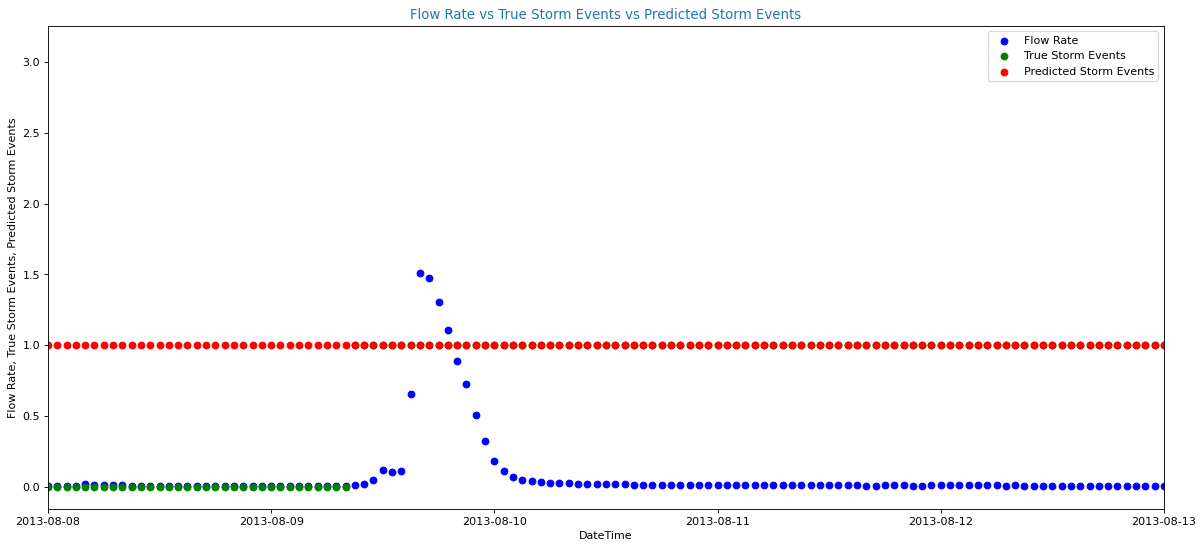

In [40]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15925,15930])

(15930, 15965)

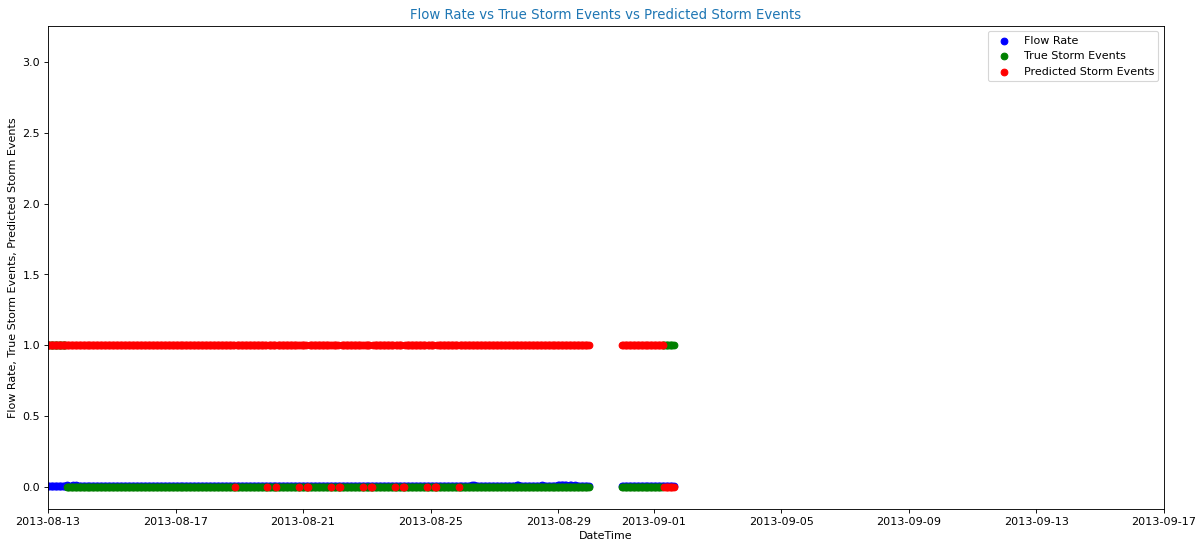

In [41]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15930,15965])

(15965, 15970)

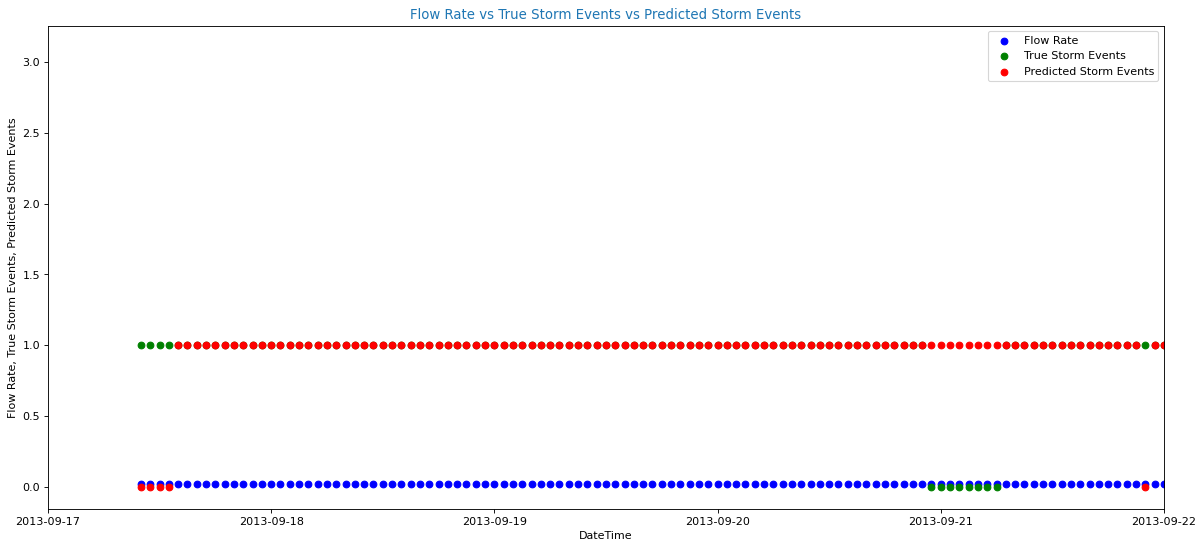

In [42]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15965,15970])

(15970, 15973)

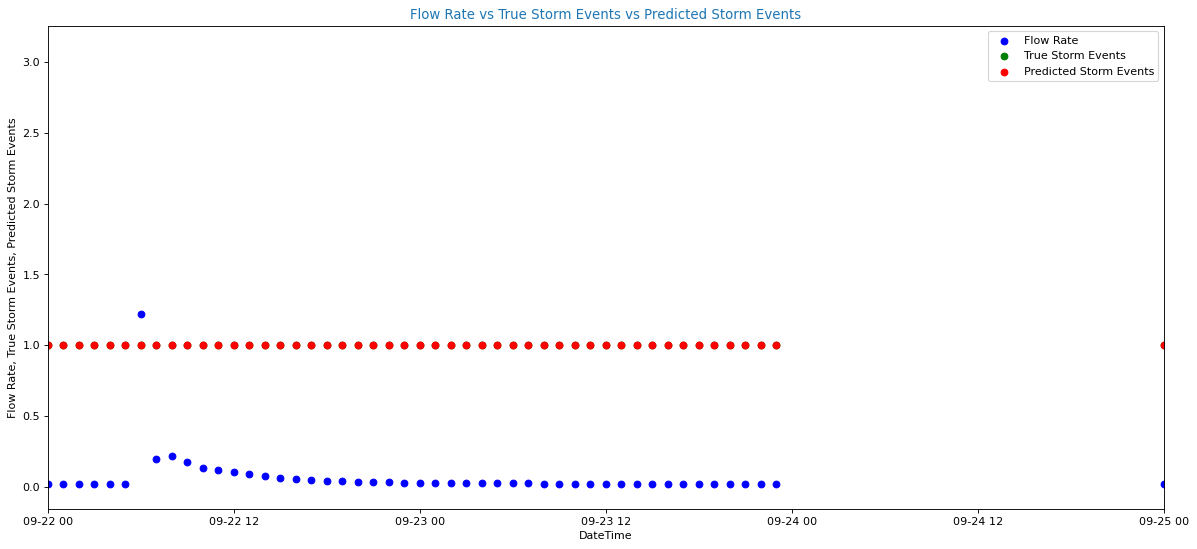

In [43]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15970,15973])

(15973, 15980)

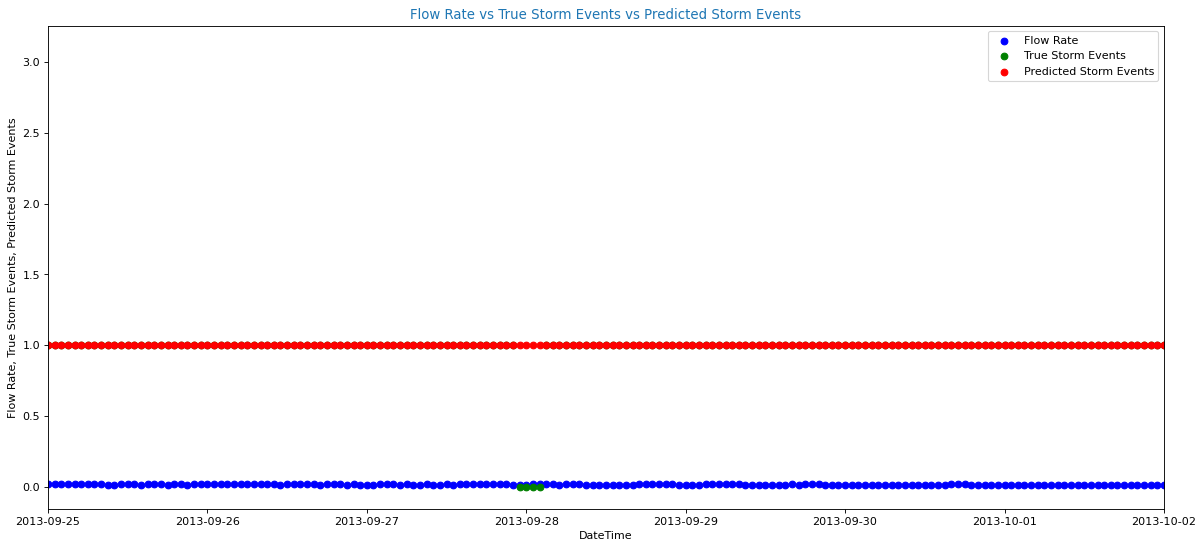

In [44]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15973,15980])

(15980, 15990)

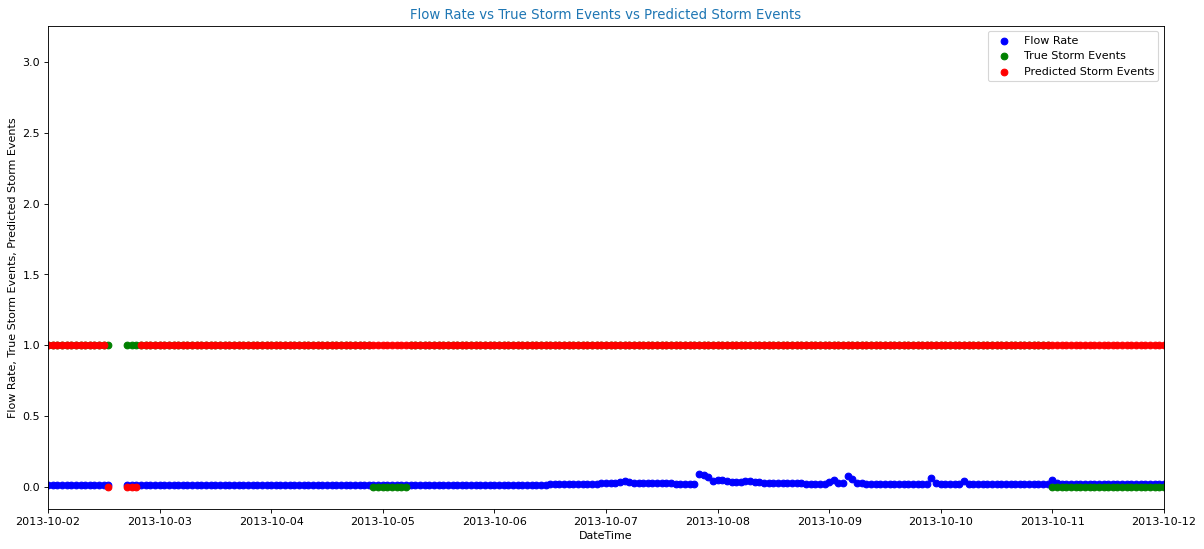

In [45]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15980,15990])

(15990, 16000)

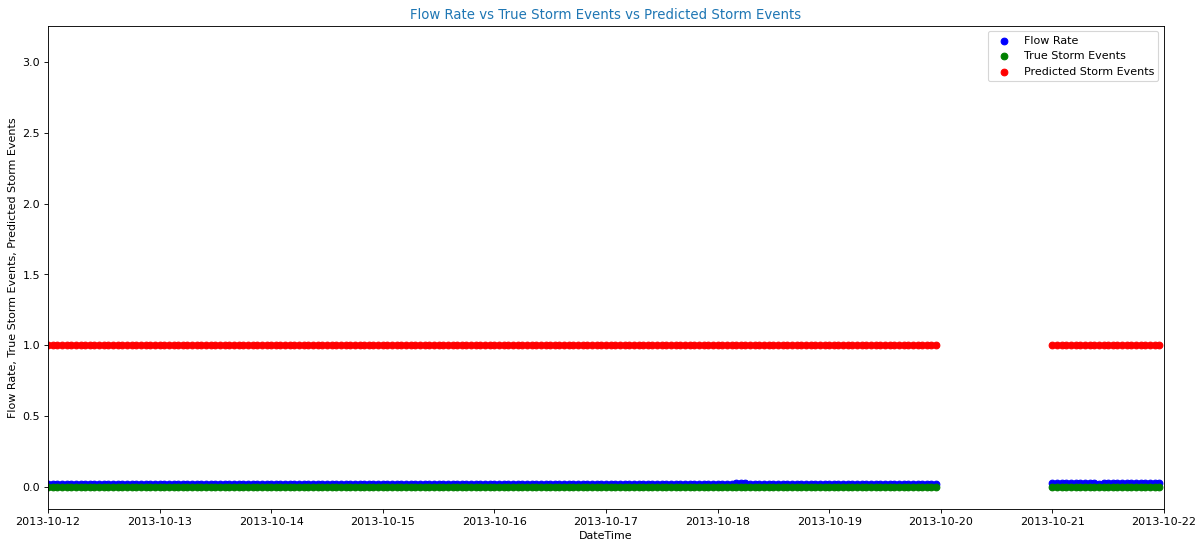

In [46]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([15990,16000])

(16000, 16025)

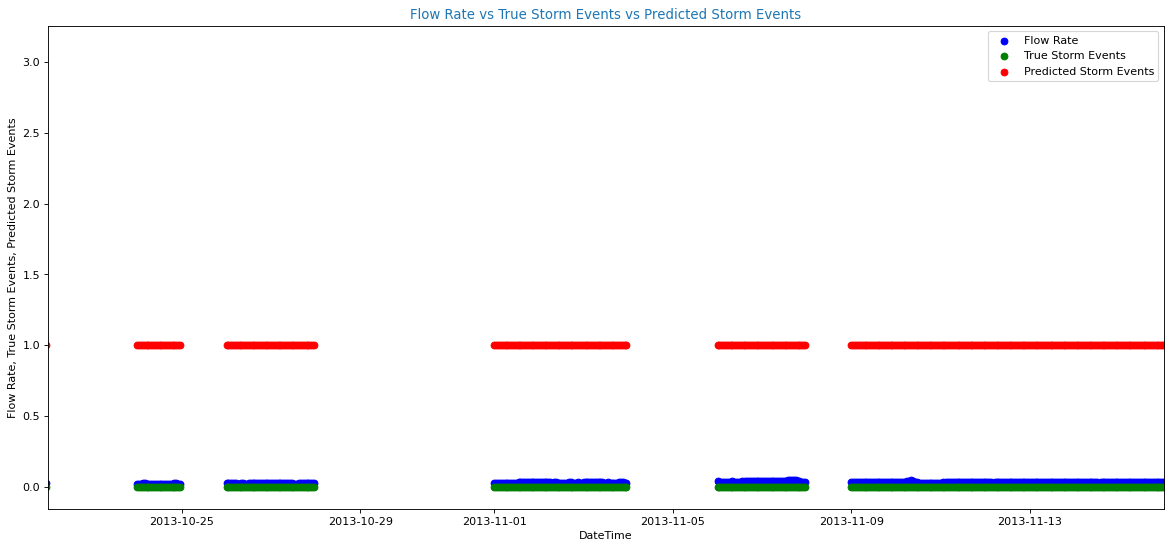

In [47]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16000,16025])

(16025, 16030)

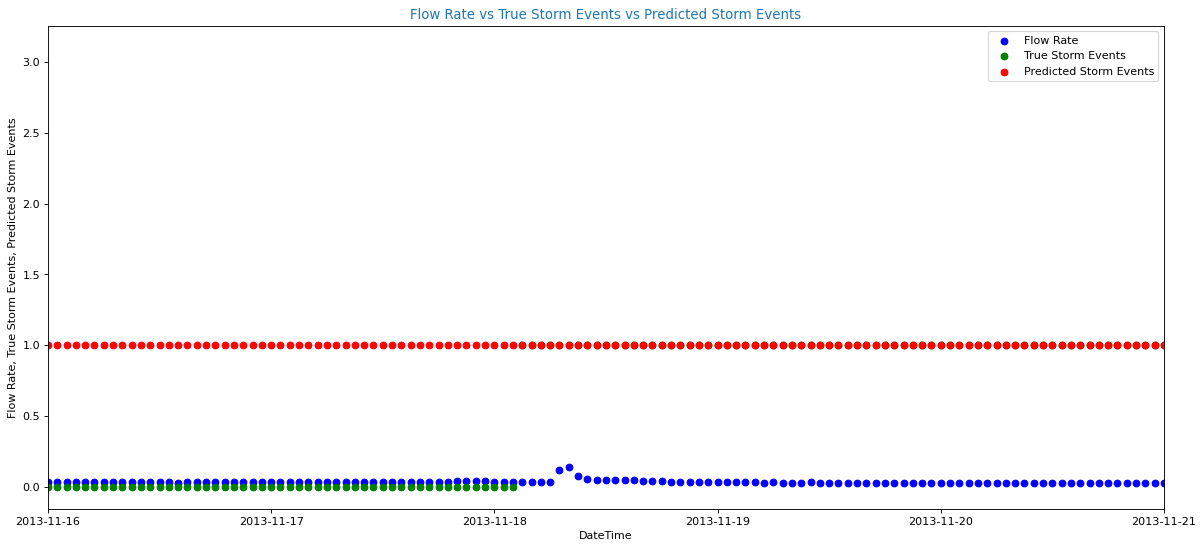

In [48]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16025,16030])

(16030, 16035)

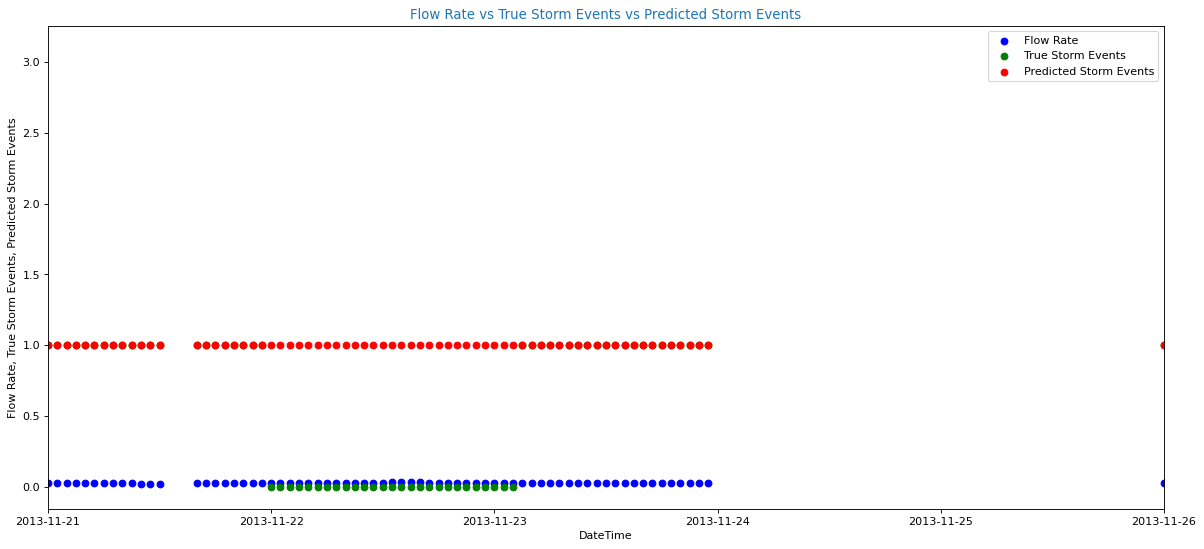

In [49]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16030,16035])

(16035, 16040)

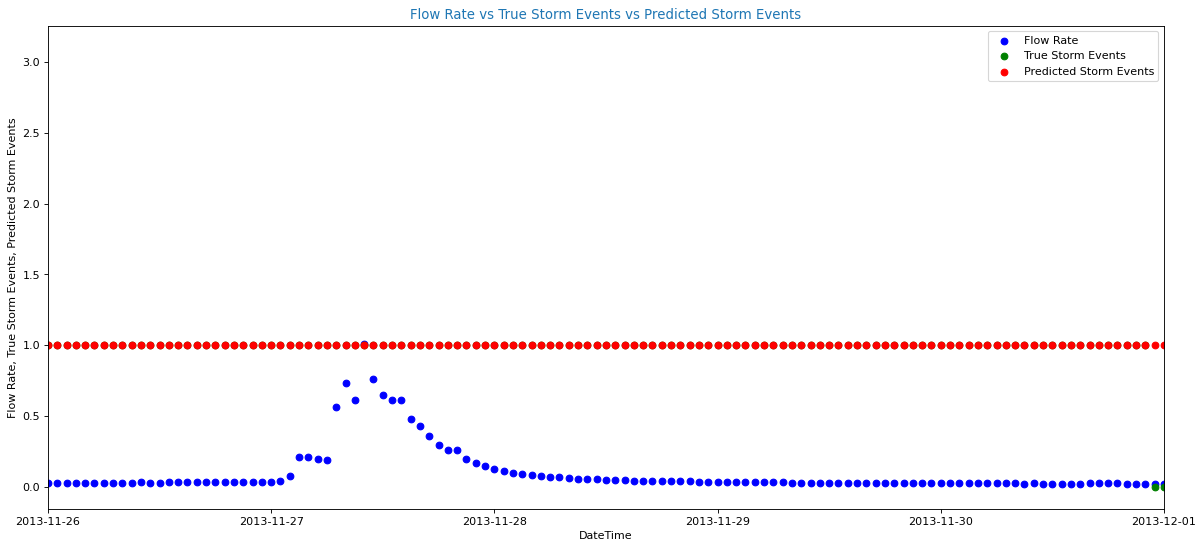

In [50]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16035,16040])

(16040, 16047)

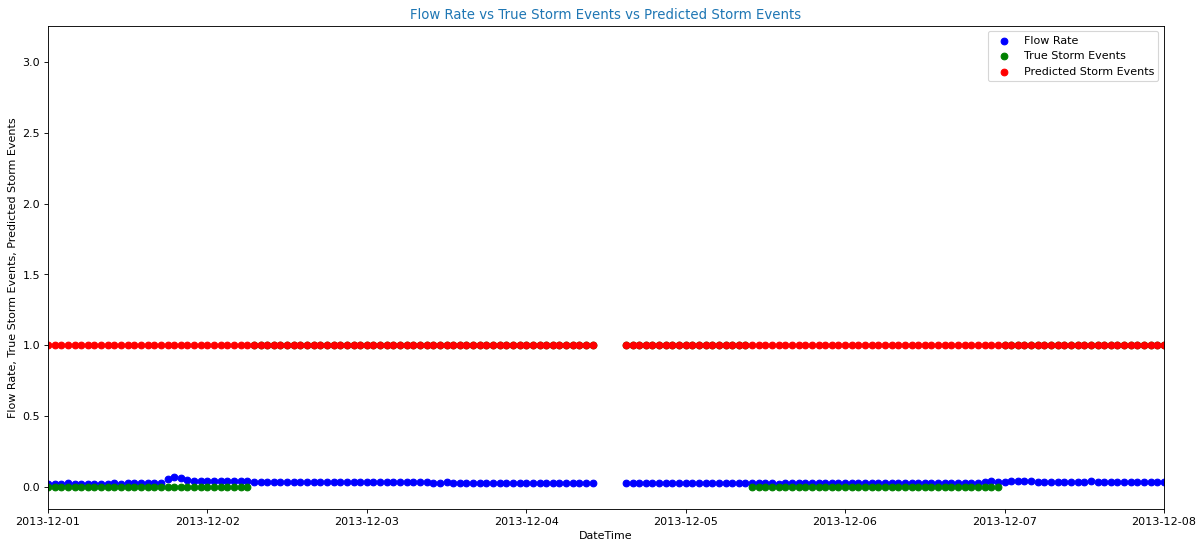

In [51]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16040,16047])

(16047, 16052)

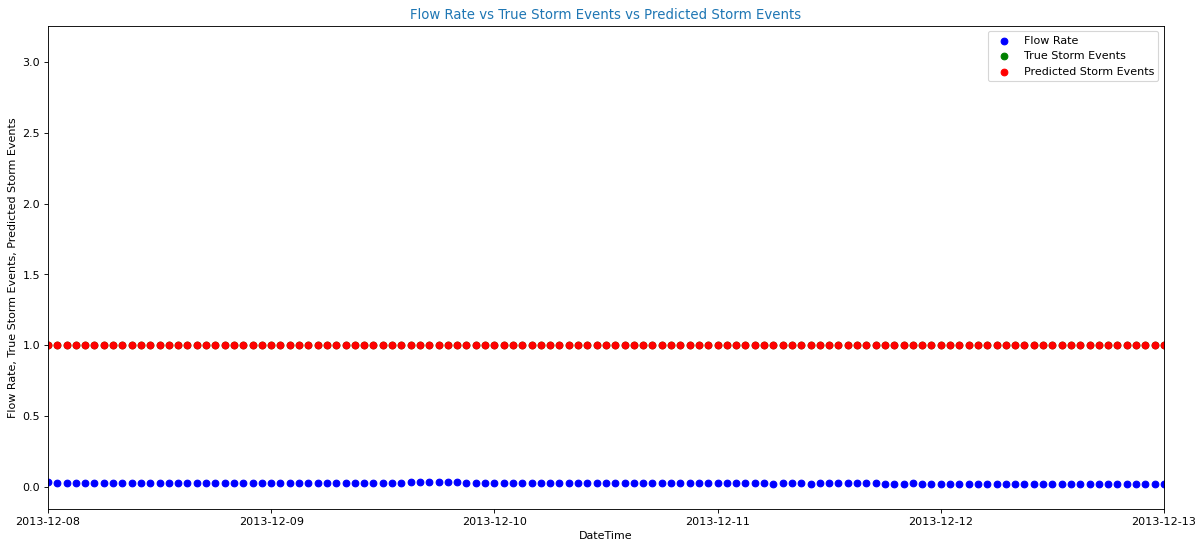

In [52]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16047,16052])

(16052, 16056)

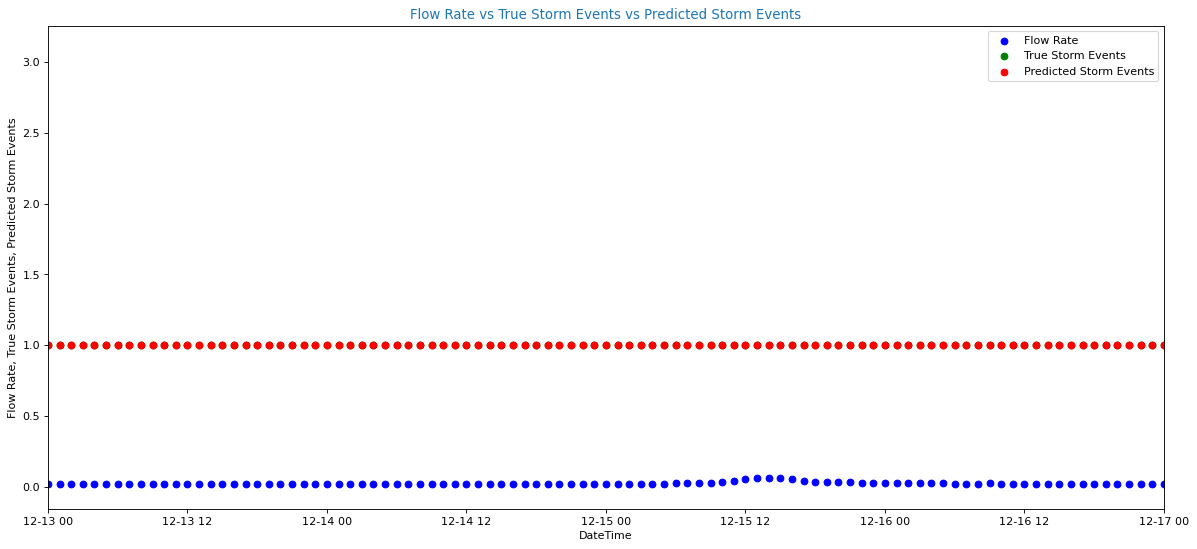

In [53]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16052,16056])

(16056, 16061)

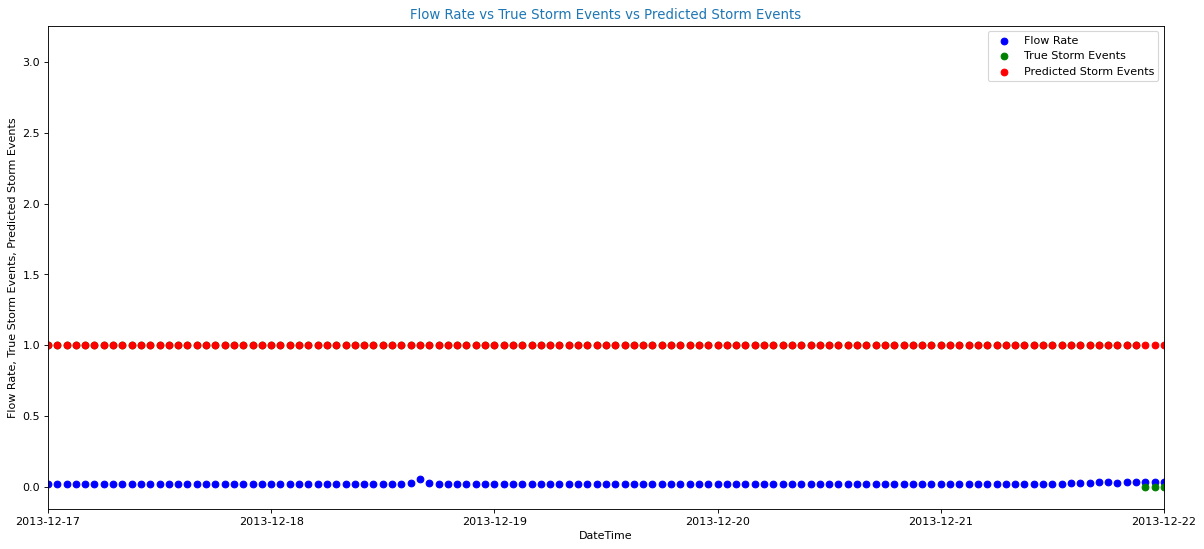

In [54]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16056,16061])

(16061, 16066)

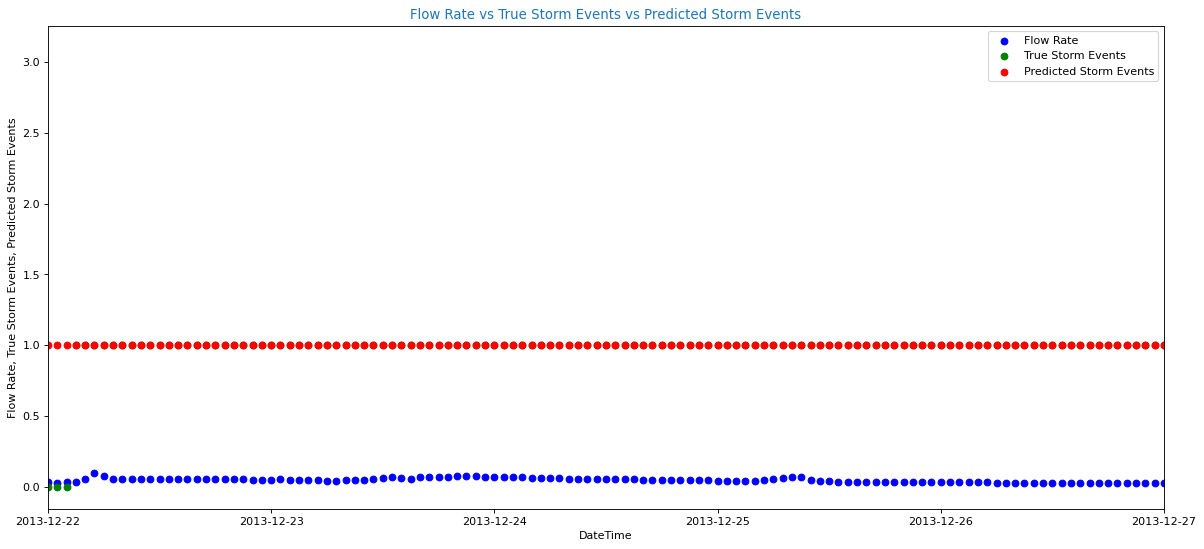

In [55]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16061,16066])

(16066, 16072)

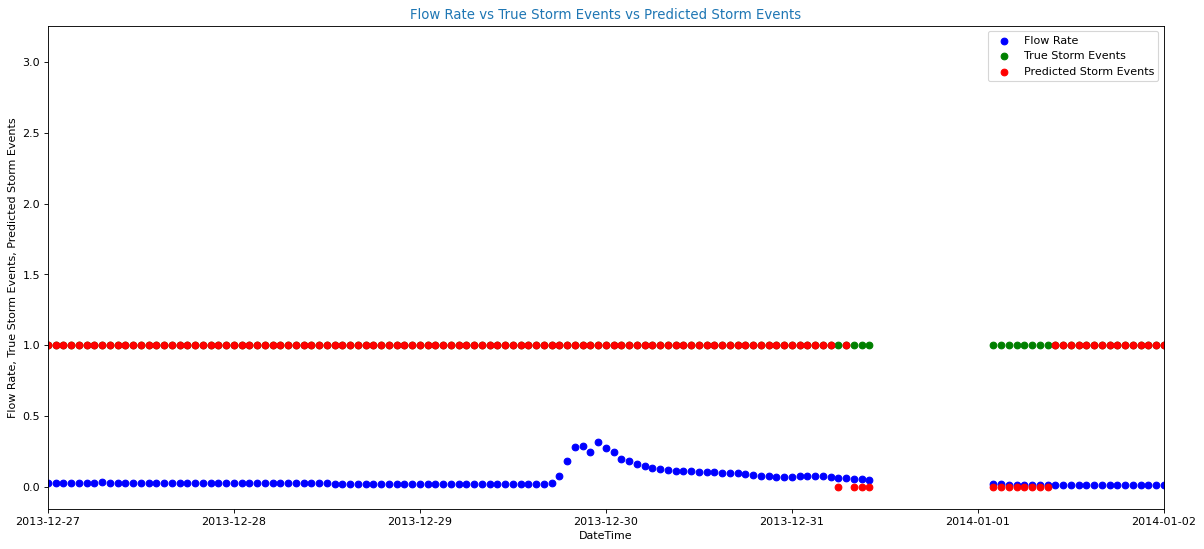

In [56]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16066,16072])

(16072, 16075)

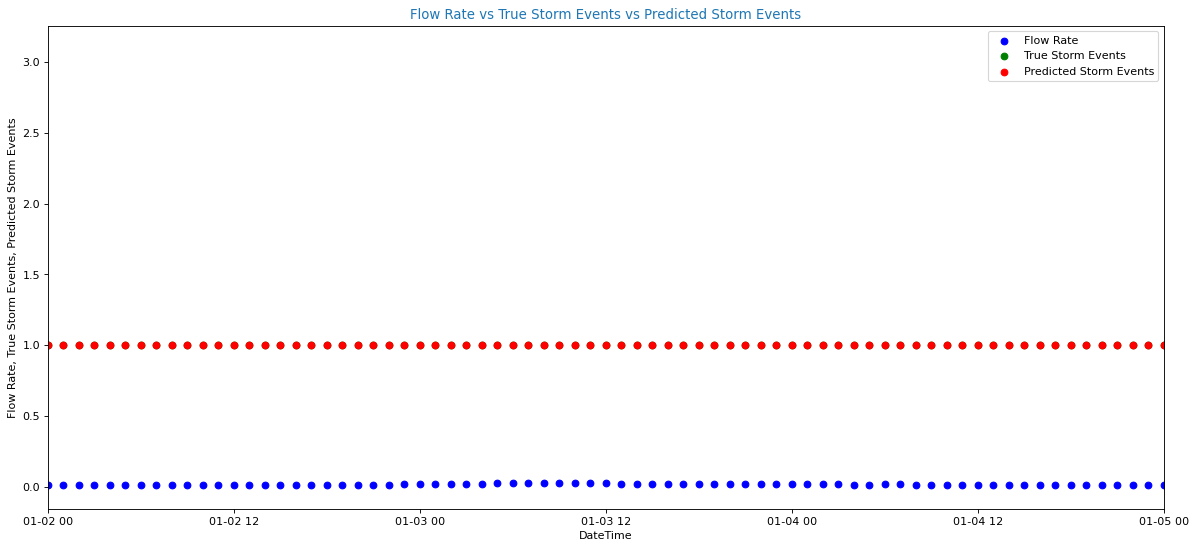

In [57]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16072,16075])

(16075, 16080)

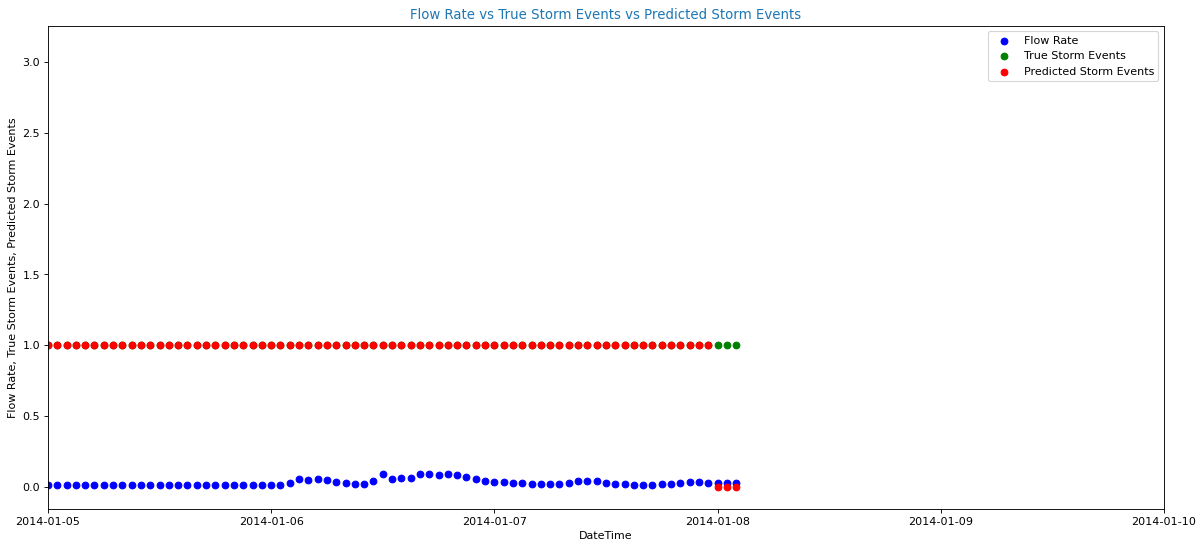

In [58]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16075,16080])

(16080, 16086)

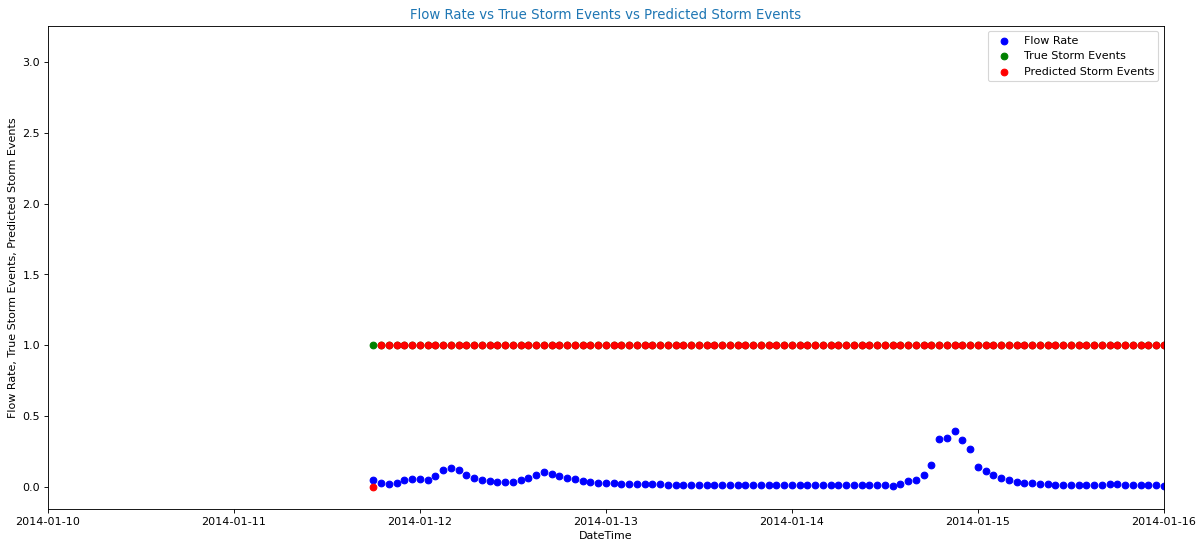

In [59]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16080,16086])

(16086, 16100)

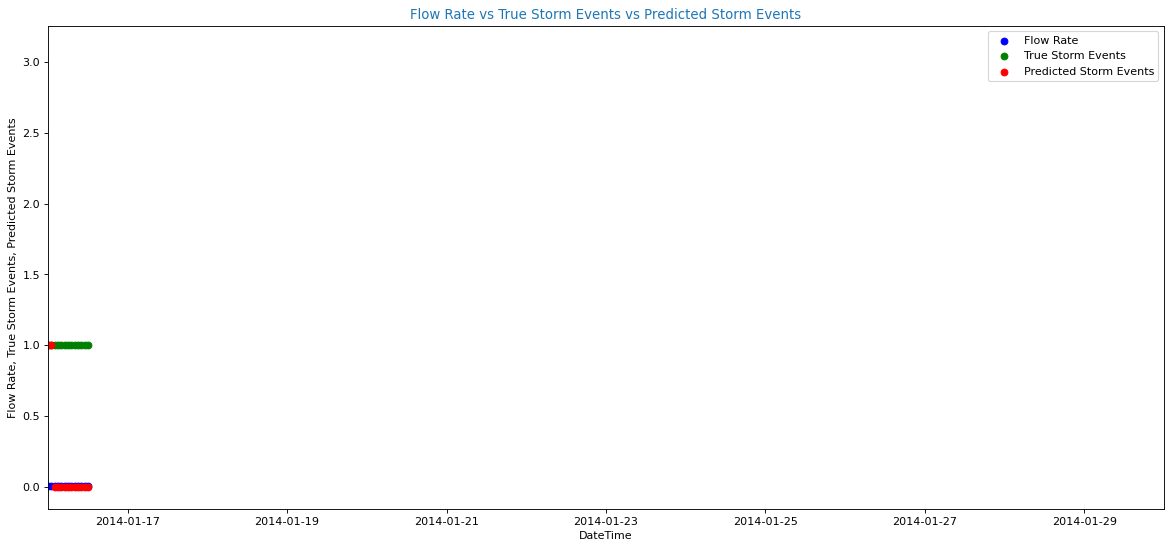

In [60]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16086,16100])

(16100, 16150)

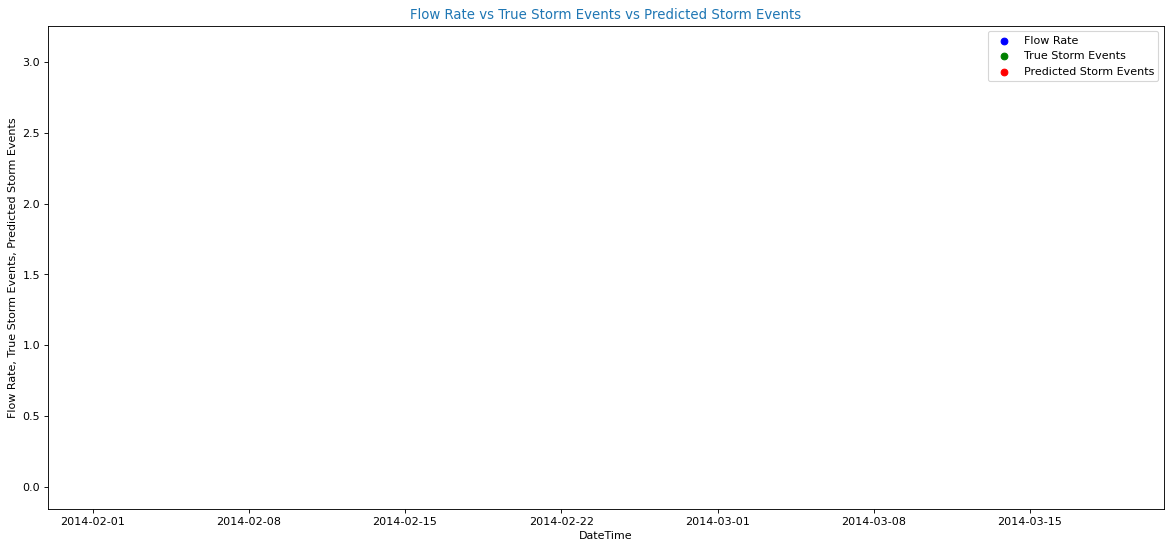

In [61]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16100,16150])

(16150, 16170)

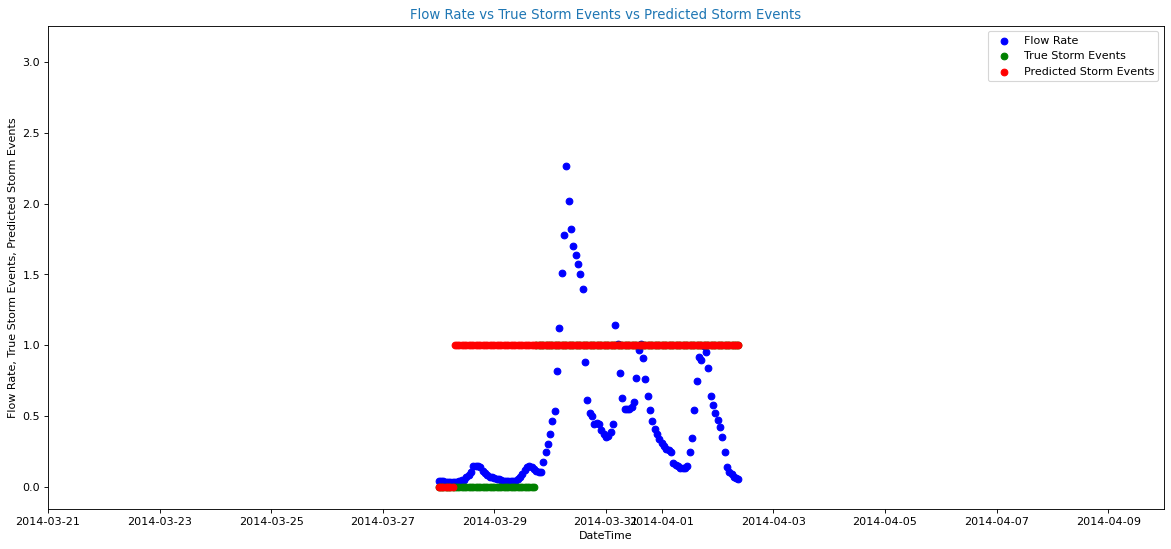

In [62]:
fig, ax = plt.subplots(figsize=(18, 8), dpi = 80)
ax.set_title('Flow Rate vs True Storm Events vs Predicted Storm Events', color='C0')
ax.set_xlabel("DateTime")
ax.set_ylabel("Flow Rate, True Storm Events, Predicted Storm Events")
ax.scatter(datetime,flow,c = 'b', label = 'Flow Rate')
ax.scatter(datetime,labels,c = 'g', label = 'True Storm Events')
ax.scatter(datetime,predictions, c = 'r', label = "Predicted Storm Events")
ax.legend()
ax.set_xlim([16150,16170])